# Week 8: Capstone Project Part 1

- Done by: A Alkaff Ahamed
- Grade: Pending
- 3 June 2025


## Learning Outcome Addressed
- Learn to implement and leverage Generative AI methods, including diffusion models and multimodal systems, to develop creative and innovative AI solutions.

From Week 8, you will begin working on your final Capstone Project. In this week, you will simulate and visualise the forward diffusion process to understand how images are progressively corrupted with noise. We recommend you try going through the [Python documentation](https://www.python.org/about/help/). if you have any issues. 

Go through the Jupyter Notebook provided in this Week for an understanding of the code flow - Jupyter Notebook and Dataset: Forward and Reverse Diffusion


### Tasks:

#### Task 1: Import Libraries

- Import required libraries (numpy, matplotlib, PIL, skimage)
  - Use the following link for reference on how to use skimage - [https://scikit-image.org/docs/stable/](https://scikit-image.org/docs/stable/)
- Load a sample grayscale or colour image
- Display the input image using matplotlib

#### Task 2: Simulate Forward Diffusion

- Create a function to add noise to an image based on a timestep `t`
- Apply the function for t = 0.1, 0.3, 0.6, 0.9 and display the results
- Organise visualisations in a subplot layout
  - Use the following link for reference on creating subplots - [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

#### Task 3: Compare Noise Schedules

- Implement two noise schedules (e.g., linear and cosine)
- Apply each schedule to the same image
- Visualise the outcomes and compare their characteristics

#### Optional Task:

- Compare diffusion models with GANs or VAEs, with a summary about noise and image structure (Approx. 100 words)


**Estimated time:** 60-90 minutes

**Submission Instructions:**

- Select the Start Assignment button at the top right of this page.
- Upload your answers in the form of a Word or PDF file.
- Upload the Python file (.ipynb) you used to complete this assignment.
- Select the Submit Assignment button to submit your responses.

*This is a graded and counts towards programme completion. You may attempt this assignment only once.*


## 📌 Task 1: Import Libraries

- Import required libraries (numpy, matplotlib, PIL, skimage)
  - Use the following link for reference on how to use skimage - [https://scikit-image.org/docs/stable/](https://scikit-image.org/docs/stable/)
- Load a sample grayscale or colour image
- Display the input image using matplotlib


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from PIL import Image
from skimage import data, img_as_float
from skimage.color import rgb2gray

# Optional: Reproducibility
import random
random.seed(44)
np.random.seed(44)
#tf.random.set_seed(44)

In [4]:
from tensorflow.python.client import device_lib

# Display all logical devices
for device in device_lib.list_local_devices():
    if device.device_type == 'GPU':
        print(f"✅ GPU Detected: {device.name} | {device.physical_device_desc}")

✅ GPU Detected: /device:GPU:0 | device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


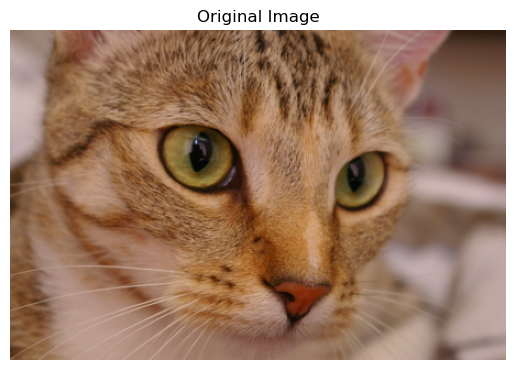

In [19]:
# Load and Display Image
# ----------------------

image = img_as_float(data.cat())

plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.savefig("task_1a_original_image.png")
plt.show()


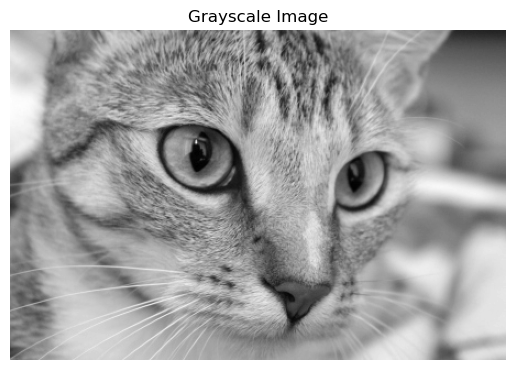

In [20]:
# Convert to Grayscale
# --------------------

image_gray = rgb2gray(image)  # Use as-is

plt.imshow(image_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.savefig("task_1b_grayscale_image.png")
plt.show()


## 📌 Task 2: Simulate Forward Diffusion

- Create a function to add noise to an image based on a timestep `t`
- Apply the function for t = 0.1, 0.3, 0.6, 0.9 and display the results
- Organise visualisations in a subplot layout
  - Use the following link for reference on creating subplots - [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)


### 🧮 Mathematical Definition

The corruption at each timestep is modelled using a simple recursive Gaussian noise addition. For a given image at step ***t−1***, the image at step ***t*** is computed as:

$$
x_t = \sqrt{1 - \beta_t} \cdot x_{t-1} + \sqrt{\beta_t} \cdot \epsilon_{t-1}
$$

**Where:**

- $\beta_t$ is a small positive constant controlling the noise added at step
- $\epsilon_{t-1} \sim \mathcal{N}(0, I)$ is standard Gaussian noise

### 🔁 Reparameterisation Trick

Calculating each step from $x_0$ to $x_t$ sequentially can be computationally expensive. A useful trick is to jump directly to any noisy version $x_t$ from the original image $x_0$, using a reparameterised formulation:

$$
x_t = \sqrt{\bar{\alpha}_t} \cdot x_0 + \sqrt{1 - \bar{\alpha}_t} \cdot \epsilon
$$

**Where:**

- $\alpha_t = 1 - \beta_t$
- $\bar{\alpha}_t = \prod_{i=1}^{t} \alpha_i$
- $\epsilon \sim \mathcal{N}(0, I)$

This expression allows direct access to any noised image $x_t$, skipping the intermediate steps.


In [21]:
# Add Noise Function
# ------------------

def add_noise(image, t):
    """
    Adds Gaussian noise to the image based on timestep t (0 <= t <= 1).
    """
    noise = np.random.randn(*image.shape)  # Gaussian noise
    noisy_image = np.sqrt(1 - t) * image + np.sqrt(t) * noise
    noisy_image = np.clip(noisy_image, 0, 1)  # Keep pixel values in [0, 1]
    return noisy_image


In [26]:
# Apply Noise Function to timesteps [0.1, 0.3, 0.6, 0.9]
# ------------------------------------------------------

timesteps = [ 0.1, 0.3, 0.6, 0.9]


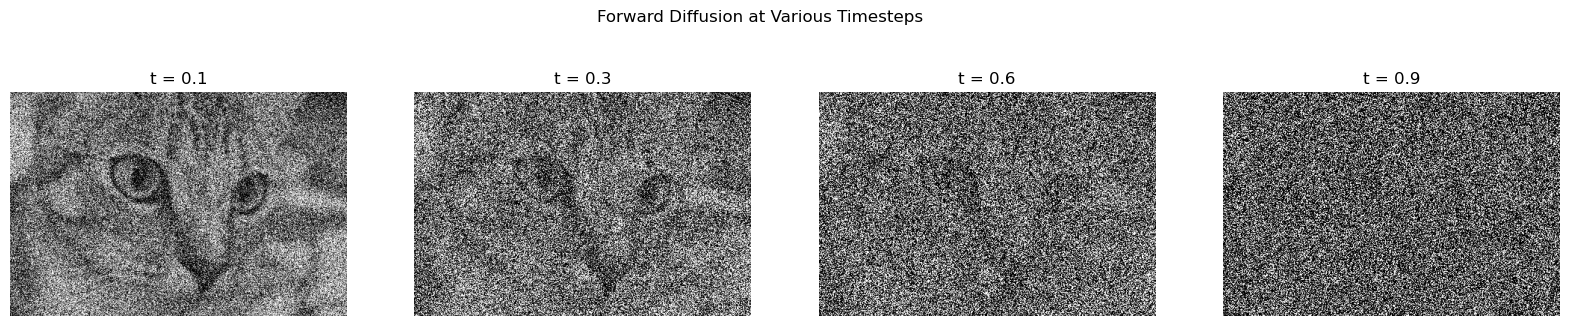

In [27]:
# Plot
# ----

fig, axes = plt.subplots(1, len(timesteps), figsize=(20, 4))

for i, t in enumerate(timesteps):
    noisy_img = add_noise(image_gray, t)
    
    axes[i].imshow(noisy_img, cmap='gray')
    axes[i].set_title(f"t = {t}")
    axes[i].axis('off')

plt.suptitle("Forward Diffusion at Various Timesteps")
plt.savefig("task_2a_noise_function.png")
plt.show()


## 📌 Task 3: Compare Noise Schedules

- Implement two noise schedules (e.g., linear and cosine)
- Apply each schedule to the same image
- Visualise the outcomes and compare their characteristics


In [34]:
# Noise Schedule Functions
# ------------------------

def linear_schedule(t):
    return t

def cosine_schedule(t):
    signal_rates = np.cos(t * np.pi / 2)
    noise_rates = np.sin(t * np.pi / 2)
    #return noise_rates, signal_rates
    return noise_rates

def offset_cosine_schedule(t, offset=0.02):
    min_signal_rate = 0.02
    max_signal_rate = 0.95
    start_angle = np.arccos(max_signal_rate)
    end_angle = np.arccos(min_signal_rate)

    diffusion_angles = start_angle + t * (end_angle - start_angle)

    signal_rates = np.cos(diffusion_angles)
    noise_rates = np.sin(diffusion_angles)

    #return noise_rates, signal_rates
    return noise_rates

def polynomial_schedule(t, degree=2):
    return t ** degree

def exponential_schedule(t):
    return 1 - np.exp(-5 * t)

def exponential_norm_schedule(t):
    return np.expm1(t) / np.expm1(1)  # Normalize exponential to [0,1]

def sigmoid_schedule(t):
    return 1 / (1 + np.exp(-12 * (t - 0.5)))


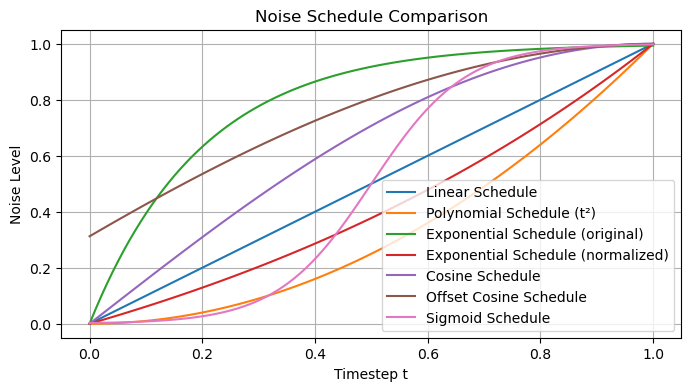

In [35]:
# Plot All Noise Schedule Functions
# ---------------------------------

t_vals = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 4))
plt.plot(t_vals, [linear_schedule(t) for t in t_vals], label='Linear Schedule')
plt.plot(t_vals, [polynomial_schedule(t) for t in t_vals], label='Polynomial Schedule (t²)')
plt.plot(t_vals, [exponential_schedule(t) for t in t_vals], label='Exponential Schedule (original)')
plt.plot(t_vals, [exponential_norm_schedule(t) for t in t_vals], label='Exponential Schedule (normalized)')

plt.plot(t_vals, [cosine_schedule(t) for t in t_vals], label='Cosine Schedule')
plt.plot(t_vals, [offset_cosine_schedule(t) for t in t_vals], label='Offset Cosine Schedule')
plt.plot(t_vals, [sigmoid_schedule(t) for t in t_vals], label='Sigmoid Schedule')

plt.title("Noise Schedule Comparison")
plt.xlabel("Timestep t")
plt.ylabel("Noise Level")
plt.legend()
plt.grid(True)

plt.savefig("task_3a_scheduler_plots.png")
plt.show()

### 🔧 Selection of Noise Schedulers for Comparison

We will proceed with the following 3 noise schedulers for visual and comparative analysis:

1. **Linear Scheduler**
2. **Cosine Scheduler**
3. **Polynomial Scheduler ($t^2$)**

These schedulers were selected to illustrate a diverse range of noise progression behaviors relative to a baseline linear schedule. Their characteristics are summarized below:

1. **Linear Schedule**
  - Serves as a baseline reference.
  - Adds noise at a constant rate across the diffusion timeline.
2. **Cosine Schedule**
  - Lies consistently above the linear curve.
  - Adds noise more aggressively in earlier timesteps and tapers off towards the end.
  - Expected to emphasize global structure early, preserving finer details later.
3. **Polynomial Schedule ($t^2$)**
  - Lies below the linear curve for most of the interval.
  - Adds noise gradually in the early timesteps and more steeply toward the end.
  - Useful for learning fine-grained details in later stages of diffusion.

These diverse schedules will provide insights into how the shape of the noise function influences image degradation during forward diffusion.


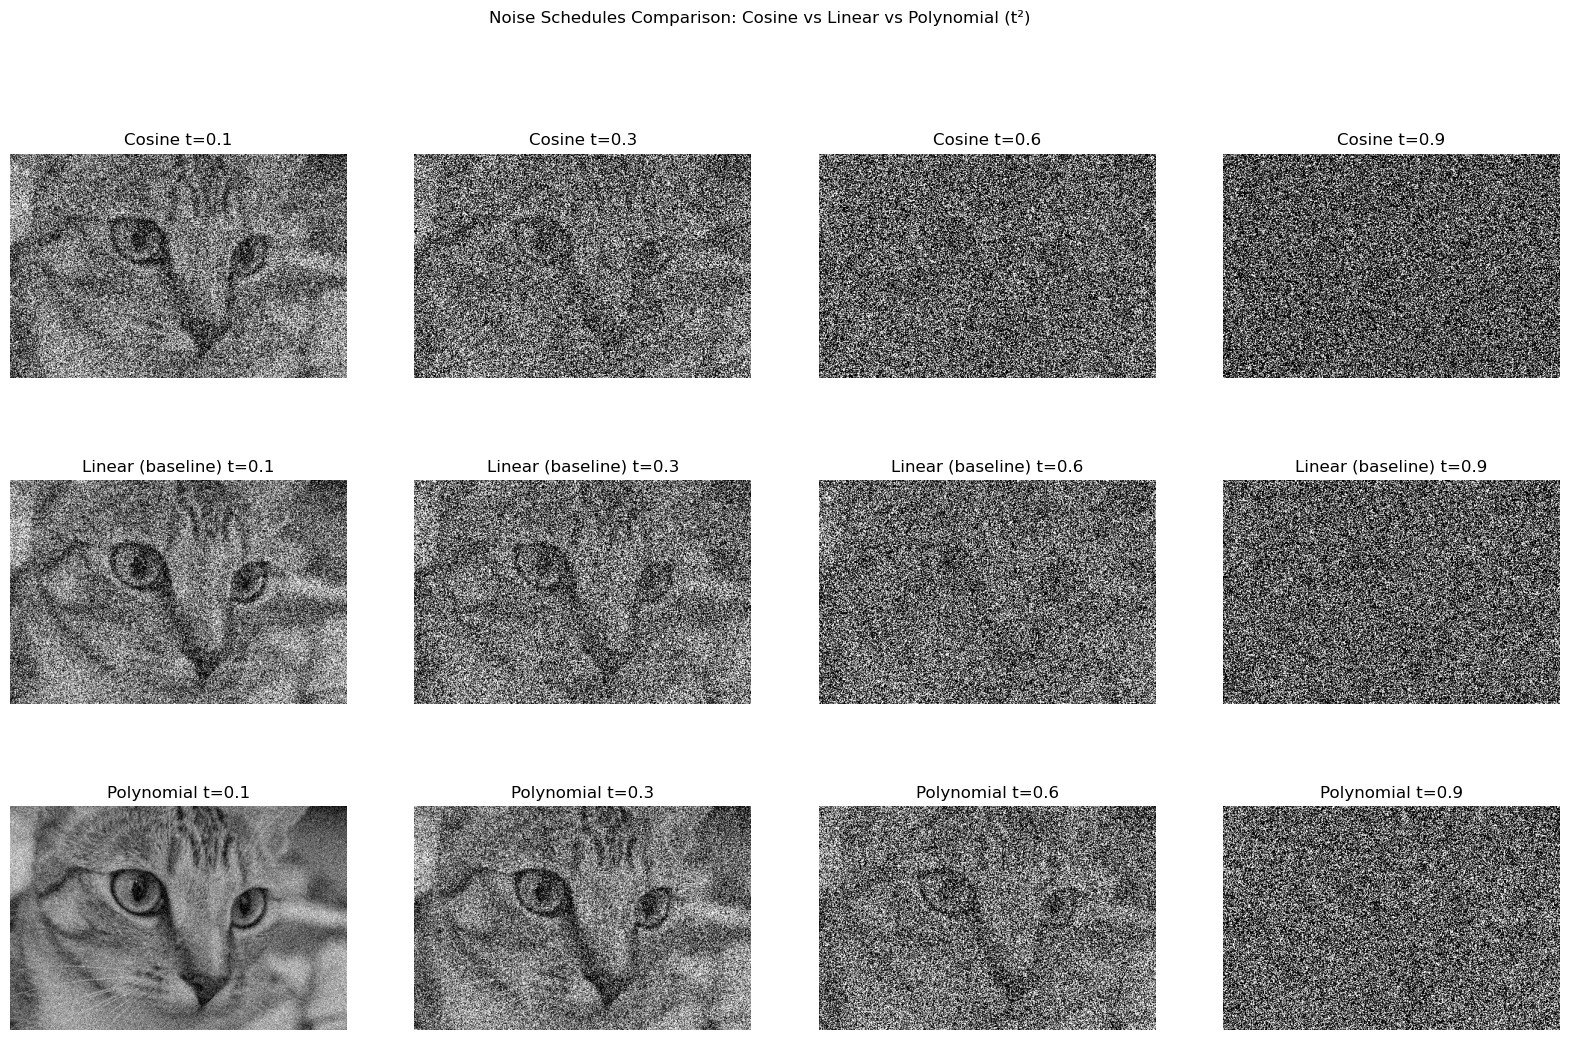

In [39]:
# Apply Noise
# -----------

fig, axes = plt.subplots(3, len(timesteps), figsize=(20, 12))

for i, t in enumerate(timesteps):
    cos_t = cosine_schedule(t)
    linear_t = linear_schedule(t)
    poly_t = polynomial_schedule(t)

    cos_img = add_noise(image_gray, cos_t)
    linear_img = add_noise(image_gray, linear_t)
    poly_img = add_noise(image_gray, poly_t)

    axes[0, i].imshow(cos_img, cmap='gray')
    axes[0, i].set_title(f"Cosine t={t}")
    axes[0, i].axis('off')

    axes[1, i].imshow(linear_img, cmap='gray')
    axes[1, i].set_title(f"Linear (baseline) t={t}")
    axes[1, i].axis('off')

    axes[2, i].imshow(poly_img, cmap='gray')
    axes[2, i].set_title(f"Polynomial t={t}")
    axes[2, i].axis('off')

plt.suptitle("Noise Schedules Comparison: Cosine vs Linear vs Polynomial (t²)")
plt.savefig("task_3b_apply_noise.png")
plt.show()


### 🔍 Observations 

- **Cosine scheduler** introduces noise more aggressively in early steps, quickly degrading image structure.
- **Linear scheduler** applies a steady increase in noise, providing a balanced degradation curve.
- **Polynomial scheduler (t²)** delays heavy noise addition, preserving more image detail in earlier steps.
- These differences highlight how scheduler choice affects the visibility of structure at intermediate noise levels, which can be crucial during reverse diffusion.


## 📌 Optional Task:

- Compare diffusion models with GANs or VAEs, with a summary about noise and image structure (Approx. 100 words)


### 🧠 Diffusion Models vs GANs

**Generation Process:**
- Diffusion: Step-by-step denoising from noise.
- GANs: One-shot generation from latent vector.

**Training Strategy:**
- Diffusion: Self-supervised noise prediction.
- GANs: Adversarial training (Generator vs Discriminator).

**Image Quality:**
- GANs often sharper, but may suffer from artifacts.
- Diffusion more consistent, with high-quality outputs.

**Stability:**
- GANs can be unstable, prone to mode collapse.
- Diffusion models are more stable and robust.

**Control:**
- Diffusion allows fine-grained control via noise schedules.
- GANs lack explicit step-wise control over generation.


### 🧠 Diffusion Models vs VAEs

**Latent Space:**
- VAE: Encodes image into a latent distribution.
- Diffusion: Applies noise directly to image or latent.

**Image Reconstruction:**
- VAE: Decoder reconstructs in a single pass.
- Diffusion: Progressive refinement through denoising steps.

**Image Sharpness:**
- VAE outputs often blurry due to likelihood-based loss.
- Diffusion models generate sharper and more detailed images.

**Structure Handling:**
- Diffusion models better preserve global and local features.
- VAEs struggle with fine-grained details.

**Control and Conditioning:**
- Diffusion models allow noise-level and prompt conditioning.
- VAEs have limited conditional control by default.


### 🪄 Summary Comparison Table

| Feature / Aspect           | Diffusion Models                          | GANs                                    | VAEs                                        |
| -------------------------- | ----------------------------------------- | --------------------------------------- | ------------------------------------------- |
| **Generation Process**     | Iterative denoising (multi-step)          | One-shot from latent vector             | One-shot from latent distribution           |
| **Training Strategy**      | Predicts noise (self-supervised)          | Adversarial: Generator vs Discriminator | Encoder-decoder with reconstruction loss    |
| **Image Sharpness**        | High-quality, detailed                    | Very sharp, but can have artifacts      | Often blurry due to pixel-wise loss         |
| **Training Stability**     | Stable, slow to train                     | Unstable, prone to mode collapse        | Stable and efficient                        |
| **Structure Preservation** | Excellent at preserving details           | May lose structure due to collapse      | Can lose fine details                       |
| **Control / Conditioning** | High — through noise schedule, prompts    | Medium — via latent manipulation        | Low — unless modified for conditioning      |
| **Latent Space Usage**     | Optional (e.g., Stable Diffusion uses it) | Yes — generator maps from latent space  | Core mechanism — sampling from latent space |
| **Output Diversity**       | High — due to stochastic denoising        | Risk of limited modes                   | Good, but may lack fine variation           |
| **Generation Speed**       | Slow (multi-step inference)               | Fast                                    | Fast                                        |


### 📋 Summary on Noise and Image Structure

**Diffusion Models:**
  - Start with pure noise and gradually denoise over many steps.
  - Image structure is built progressively, preserving high-frequency details.
  - Explicit noise control enables stable training and fine-grained outputs.

**GANs (Generative Adversarial Networks):**
  - Noise is input as a latent vector; image is generated in one forward pass.
  - Structure formation is implicit, relying on adversarial training to refine realism.
  - Can capture sharp global structure but prone to mode collapse or artifacts.

**VAEs (Variational Autoencoders):**
  - Noise is introduced in the latent space during encoding/decoding.
  - Reconstructed images may lose fine details, leading to blurrier results.
  - Image structure depends on how well the latent space captures variations.
